In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## โจทย์
ในฐานะ Data Scientist ของบริษัท Thaiแทร่ คุณได้รับมอบหมายให้ทำการสร้างโมเดล AI เพื่อจำแนก


ความเห็นของนักเรียนในปีการศึกษา 2561 ต่อนโยบายการศึกษา และสอบเข้าในช่วง Tcas61 ว่าเป็นเชิงบวก หรือเชิงลบ


เพื่อนำมาวิเคราะห์ผลตอบรับใน Social Media หลังการออกนโยบายการศึกษาของประเทศไทยในปี 2567 ว่ามีผลเป็นบวก หรือเป็นลบ

### โหลดข้อมูล

In [2]:
df = pd.read_csv(
    "C:/Users/thatt/OneDrive/Documents/Coding Project/MyPyhtonLearn/class/Project/nlp/text_classification/data/tcas61.csv",
    encoding="utf-8",
)
df.head()

,text,label
0,มึงกล้าพูดรึป่าวว่าระบบการศึกษามันดีอ่ะ ถุ้ยเฟ...,neg
1,เบื่อเวลามาโพสตไรแบบนี้ชอบเป็นพวกที่ใช่โปรไฟล์...,neg
2,พ่อมึงเป็นติ่งรัฐบาลหรอสัส ที่เรียกเก็บตังแพงม...,neg
3,ใครก็ช่วยลบไอ้นี้ออกจากกลุ่มหน่อยครับ มันมาโพส...,neg
4,เครียดมากอะตอนนี้,neg


In [3]:
for data in df["text"][10:15]:
    print(data)  # ลองดูแบบเต็มๆ

นี่เสียกำลังใจเยอะแล้ว 😢
พี่เป็นกำลังใจให้กับทุกคนเลย สู้ๆ
ดีใจด้วยทุกคน
ชีวิตจะสำเร็จอยู่ที่ความพยายาม เข้มแข็งเดินทางที่ถูกอะไรก้อเกิดขึ้นได้ สู้ๆนะคะ
ขอบคุณทุกกำลังใจนะคะ จะพยายามทำปัจจุบันให้ดีที่สุด


### วิเคราะห์ข้อมูล

In [4]:
df.shape  # ยาวกี่แถว มีกี่คอลัมน์

(123, 2)

In [5]:
df["label"].unique()  # เช็คว่ามี Class อะไรบ้าง

array(['neg', 'pos'], dtype=object)

<BarContainer object of 2 artists>

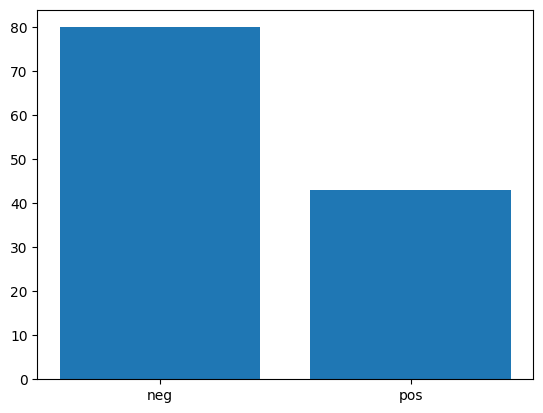

In [6]:
label = df["label"].unique()
positive = df[df["label"] == label[0]]
negative = df[df["label"] == label[1]]

plt.bar([label[0], label[1]], [len(positive), len(negative)])

## ทำการ Vectorize ข้อมูล

In [7]:
# แบ่งข้อมูลเป็น 2 ส่วน คือ ข้อมูลสำหรับ Train และ Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.30, random_state=0
)

In [8]:
from pythainlp.tokenize import word_tokenize  # ตัวตัดคำภาษาไทย

# ทดสอบการตัดคำ
word_tokenize("ทดสอบการตัดคำภาษาไทย")

['ทดสอบ', 'การ', 'ตัด', 'คำ', 'ภาษาไทย']

#### สร้าง Vectorize ข้อมูล Feature (X) ด้วย Bag of Words

In [9]:
# เราจะทำการลองสร้าง Bag of Words ด้วยตัวเอง
all_words = []
for sentence in X_train:
    all_words.extend(word_tokenize(sentence))  # ตัดคำแล้วเก็บคำทั้งหมดไว้ใน all_words

# ทำใ้ห้คำซ้ำไม่เกิดขึ้น ด้วยการแปลงเป็น set แล้วกลับมาเป็น list อีกครั้ง
all_words = list(set(all_words))
print("จำนวนคำทั้งหมดใน Bag of Words:", len(all_words))


def encode_words(text):  # สร้างฟังก์ชันสำหรับ encode คำให้เป็น Bag of Words
    words = word_tokenize(text)  # ตัดคำในประโยค เพื่อเปรียบเทียบกับ Bag of Words
    encoded_words = []
    for word in all_words:  # วนลูปเช็คคำที่อยู่ใน Bag of Words
        if word in words:  # ถ้าคำใน Bag of Words อยู่ในประโยค
            encoded_words.append(1)  # เพิ่มค่า 1 ใน list
        else:  # ถ้าคำใน Bag of Words ไม่อยู่ในประโยค
            encoded_words.append(0)  # เพิ่มค่า 0 ใน list
    return encoded_words  # ส่งค่ากลับเป็น list ของคำที่ถูก encode แล้ว ex. [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


# ทดสอบการทำงานของฟังก์ชัน encode_words
print(encode_words("ทดสอบการตัดคำภาษาไทย"))

จำนวนคำทั้งหมดใน Bag of Words: 728
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

#### สร้าง Vectorize ข้อมูล Label (Y)

In [10]:
df["label"].unique()

array(['neg', 'pos'], dtype=object)

In [11]:
label_encode = {
    "pos": 1,
    "neg": 0,
}  # สร้าง dict สำหรับแปลง label ให้เป็นตัวเลข, ทำ Labels ของเราเป็นตัวเลขเพื่อให้โมเดลเรียนรู้ได้
label_decode = {1: "pos", 0: "neg"}  # สร้าง dict สำหรับแปลงตัวเลขให้กลับเป็น label
# ทดสอบการทำงานของ dict
print(label_encode[df["label"].unique()[1]])
print(label_decode[1])
print(
    "ดูดีๆนะว่า Encoder เราตรงกับ Decoder ไหม แล้ว key กับ", df["label"].unique(), "ตรงกันไหม"
)

1
pos
ดูดีๆนะว่า Encoder เราตรงกับ Decoder ไหม แล้ว key กับ ['neg' 'pos'] ตรงกันไหม


#### Vectorize ข้อมูลทั้งหมด (Train, Test)

In [12]:
X_train_encoded = [
    encode_words(sentence) for sentence in X_train
]  # ทำการ encode ข้อมูล Train
X_test_encoded = [
    encode_words(sentence) for sentence in X_test
]  # ทำการ encode ข้อมูล Test
y_train_encoded = [
    label_encode[label] for label in y_train
]  # ทำการ encode label ข้อมูล Train
y_test_encoded = [
    label_encode[label] for label in y_test
]  # ทำการ encode label ข้อมูล Test
# แปลงข้อมูลเป็น NumPy array
X_train_encoded = np.array(X_train_encoded)
X_test_encoded = np.array(X_test_encoded)
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

In [13]:
# ทดสอบการทำงานของการแปลงข้อมูลเป็น NumPy array
print(X_train_encoded.shape)
print(X_test_encoded.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(86, 728)
(37, 728)
(86,)
(37,)


### เริ่มสร้างโมเดล

In [14]:
from sklearn.linear_model import LogisticRegression  # นำเข้าโมเดล Logistic Regression

model = LogisticRegression()  # สร้างโมเดล
model.fit(X_train_encoded, y_train_encoded)  # สร้างโมเดล
print("อ่าว เสร็จแล้ว...")

อ่าว เสร็จแล้ว...


### วัดผลโมเดล ด้วย Classification Report และ Confusion Matrix

In [15]:
y_pred = model.predict(X_test_encoded)  # ทำนายผล บนข้อมูล Test
y_pred  # ผลลัพธ์ที่ได้จากการทำนาย

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

Accuracy: 0.918918918918919
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.91      0.83      0.87        12

    accuracy                           0.92        37
   macro avg       0.92      0.90      0.91        37
weighted avg       0.92      0.92      0.92        37

Confusion Matrix:
0 คือ neg 1 คือ pos


<Axes: >

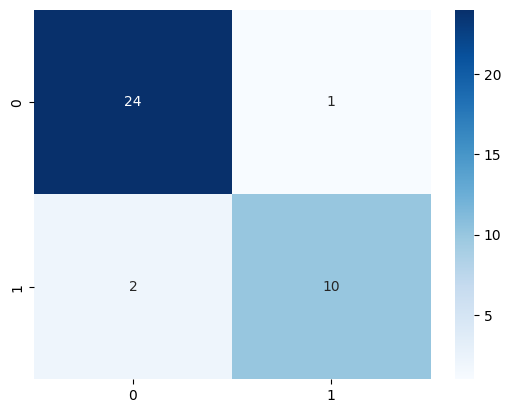

In [16]:
import seaborn as sns  # นำเข้า package seaborn เพื่อสร้าง Heatmap
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)  # นำเข้าฟังก์ชันที่ใช้ประเมินผล

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))  # ประเมินผลโมเดล
print(
    "Classification Report:\n", classification_report(y_test_encoded, y_pred)
)  # แสดง Classification Report

print("Confusion Matrix:")
print("0 คือ", label_decode[0], "1 คือ", label_decode[1])
sns.heatmap(
    confusion_matrix(y_test_encoded, y_pred), annot=True, cmap="Blues"
)  # สร้าง Confusion Matrix แสดงความแม่นยำของโมเดล

### ลองเล่นโมเดลตัวเอง

In [18]:
text = "ดีใจ"
vector = encode_words(text)
pred = model.predict([vector])[0]
print("Text ที่ใช้ทดสอบ:", text)
print("This is a", label_decode[pred])
print("Wow! เราทำ AI สำเร็จแล้วนะ ดูดีๆนะว่าโมเดลเราทำนายถูกไหม")

Text ที่ใช้ทดสอบ: ดีใจ
This is a pos
Wow! เราทำ AI สำเร็จแล้วนะ ดูดีๆนะว่าโมเดลเราทำนายถูกไหม


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.97        14

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



c:\Users\thatt\OneDrive\Documents\Coding Project\MyPyhtonLearn\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thatt\OneDrive\Documents\Coding Project\MyPyhtonLearn\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thatt\OneDrive\Documents\Coding Project\MyPyhtonLearn\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

<Axes: >

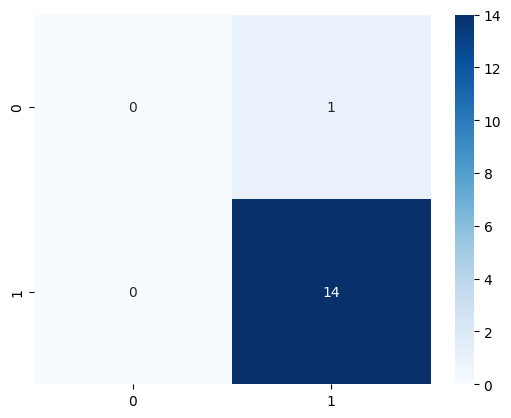

In [19]:
print(
    classification_report(
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    )
)
sns.heatmap(
    confusion_matrix(
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    ),
    annot=True,
    cmap="Blues",
)  # สร้าง Confusion Matrix แสดงความแม่นยำของโมเดล